# 정규화 선형회귀 (Regularization)

### Ridge 와 Lasso

### Ridge 회귀
$\text{cost} = \sum e^2_i + \lambda\sum w^2_i$

$e^2_i$는 잔차(residual)의 제곱합, Ridge는 가중치들의 제곱합을 최소화하기 위함이다.

여기서 $\;\lambda\;$는 잔차 제곱합과 추가적인 제약조건(가중치)의 비중을 조절하기위한 Hyper parameter인데,

$\lambda$가 커질수록, 정규화의 정도가 커져서 어떻게든 제약조건에 맞춰야하기때문에 가중치가 0으로 수렴한다.


반면, $\lambda$가 작아질수록, 정규화 정도가 작아져서 $\lambda$가 0이 되면 일반 선형회귀 모형이 된다.

### LASSO 회귀
$\text{cost} = \sum e^2_i + \lambda\sum \,|\,w_i\,|$

LASSO(Least Absolute Shrinkage and Selection Operator) 회귀 모형은 가중치의 절대값의 합을 최소화하는 것을 추가적 제약조건으로 한다.


### Elastic Net 회귀 모형

Elastic Net 회귀 모형은 Ridge와 LASSO 모형을 혼합한 모형이다.

$\text{cost} = \sum e^2_i \, + \, \lambda_1 \sum \,|\,w_i\,| + \lambda_2 \sum w^2_i $

$\lambda_1 , \lambda_2$ 두개의 Hyper parameter를 가진다.

> $\lambda_1$ 이 0이면 Ridge, $\lambda_2$가 0이면 LASSO.

> Elastic Net은 Ridge와 LASSO를 포괄한다.

# statsmodels의 정규화 회귀 모형

Elastic Net 모형만 지원. 하지만, Ridge, LASSO, Elastic Net 모두 사용 가능하지!

[statsmodels 링크](http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.fit_regularized.html)

In [28]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
%matplotlib inline


In [30]:
np.random.seed(0)                       # random-state를 정한다.
n_samples = 30
X = np.sort(np.random.rand(n_samples))  # 0에서 1사이의 값 랜덤 샘플 추출(유니폼분포따름)
y = np.cos(1.5 * np.pi * X) + np.random.randn(n_samples) * 0.1

dfX = pd.DataFrame(X, columns=["x"])
dfX = sm.add_constant(dfX)              # 이모님. 여기 상수항 추가~
dfy = pd.DataFrame(y, columns=["y"])
df = pd.concat([dfX,dfy],axis = 1)      # 칼럼으로 붙이도록!!

model = sm.OLS.from_formula("y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5)", data = df)
result1 = model.fit()


In [32]:
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     182.9
Date:                Tue, 14 Jun 2016   Prob (F-statistic):           2.73e-18
Time:                        00:43:27   Log-Likelihood:                 25.117
No. Observations:                  30   AIC:                            -38.23
Df Residuals:                      24   BIC:                            -29.83
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.1269      0.158      7.118      0.0

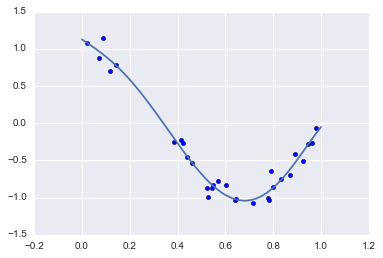

In [40]:
def plot_statsmodels(result):
    plt.scatter(X,y)
    xx = np.linspace(0,1,1000)                    # 0부터 1사이까지 1000개의 숫자 생성해주삼
    dfxx = pd.DataFrame(xx, columns=["x"])
    dfxx = sm.add_constant(dfxx)
    plt.plot(xx, result.predict(dfxx))
    plt.show()

plot_statsmodels(result1)

Intercept    0.707154
x           -2.229501
I(x ** 2)   -0.842831
I(x ** 3)    0.197524
I(x ** 4)    0.813785
I(x ** 5)    1.160351
dtype: float64


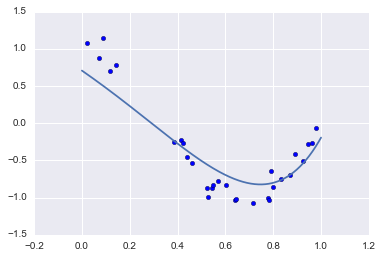

In [41]:
result2 = model.fit_regularized(alpha=0.01, L1_wt=0)            # Ridge
print(result2.params)
plot_statsmodels(result2)

Intercept    0.781925
x           -2.655537
I(x ** 2)   -0.253033
I(x ** 3)    0.000000
I(x ** 4)    0.671228
I(x ** 5)    1.280714
dtype: float64


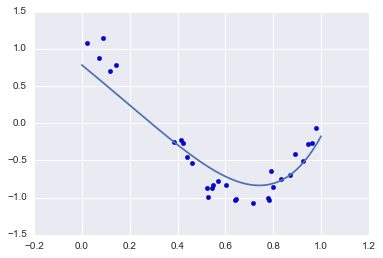

In [43]:
result3 = model.fit_regularized(alpha=0.01, L1_wt=0.5)            # Elastic Net
print(result3.params)
plot_statsmodels(result3)

Intercept    0.914843
x           -3.073134
I(x ** 2)    0.000000
I(x ** 3)    0.000000
I(x ** 4)    0.000000
I(x ** 5)    2.092835
dtype: float64


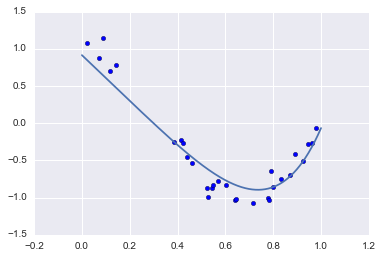

In [44]:
result4 = model.fit_regularized(alpha=0.01, L1_wt=1)            # LASSO
print(result4.params)
plot_statsmodels(result4)

# 뭔소린지는 모르겠지만 일단 공유한다!!

[Ridge와 LASSO 설명 블로그](http://www.datamarket.kr/xe/?mid=board_BoGi29&document_srl=7176&listStyle=viewer)

<img src="http://www.datamarket.kr/xe/files/attach/images/127/176/007/9b3cd0ce8fae5392cd6b3b6829b7602c_1.PNG" width="320" height="240" align="left"/>
<img src="http://www.datamarket.kr/xe/files/attach/images/127/176/007/b6b7543bfc0abb3cbb1d66eadb340ff9.PNG" width="320" height="240" align="center"/>